Metal device set to: Apple M1


2022-10-14 16:32:13.222239: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-14 16:32:13.222470: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


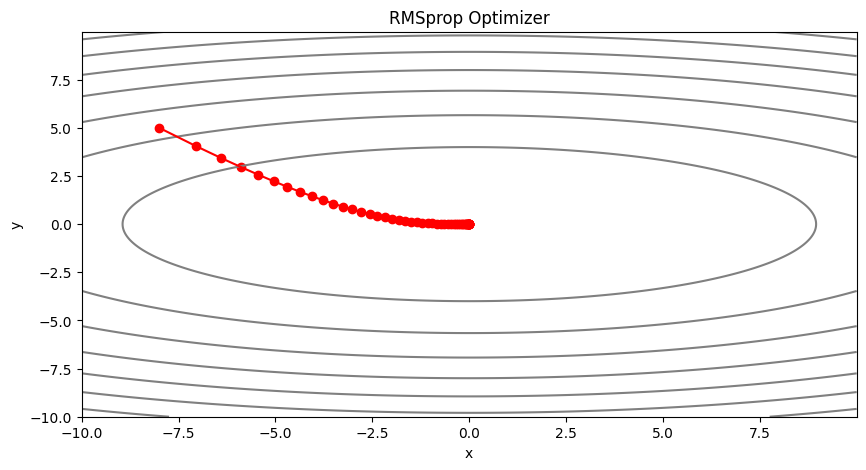

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

x = tf.Variable(-8.00000)
y = tf.Variable(5.00000)

def ObjFun():   # 定義目標函數
    output = (0.5)*(x**2)+2.5*(y**2)  
    return  output

def Draw_fun(x,y):  # 要繪圖的函數, 與目標函數同
    z = (0.5)*(x**2)+2.5*(y**2)
    return z

# rho : 衰減因子, 也就是梯度方均根的衰減率
opt = tf.keras.optimizers.RMSprop(learning_rate = 0.3,rho=0.9)

epochs = 50    # 疊代次數
xValueArr=[-8]   # x 的初始值
yValueArr=[5]    # y 的初始值
for epoch in range(epochs):
    opt.minimize(ObjFun, var_list=[x,y])
    xValueArr.append(x.numpy())
    yValueArr.append(y.numpy())
    
x = np.arange(-10.0, 10.0, 0.01)
y = np.arange(-10.0, 10.0, 0.01)
X, Y = np.meshgrid(x, y)
Z = Draw_fun(X,Y)
plt.figure(figsize = (10,5))
CS = plt.contour(X,Y,Z, colors = 'gray')
plt.title("RMSprop Optimizer")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(xValueArr, yValueArr, c='r')
for xt, yt in zip(xValueArr,yValueArr):
    plt.scatter(xt, yt , c='r')
plt.show()